In [2]:
pip install ucimlrepo

**Imports y Librerías**

Importo las librerías necesarias para realizar el trabajo. Se requiere manejo de datos con Pandas, visualización (Matplotlib/Seaborn/Plotly),estandarización para PCA, y el dataset que se importa desde ucimlrepo.

In [3]:
import pandas as pd
from ucimlrepo import fetch_ucirepo
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import ConfusionMatrixDisplay

Aquí se va a importar el dataset de Breast Cancer Wisconsin (Diagnostic) desde UCI usando ucimlrepo. Este es todo el código que da UCI cuando se le da import.

In [4]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
breast_cancer_wisconsin_diagnostic = fetch_ucirepo(id=17)

# data (as pandas dataframes)
X = breast_cancer_wisconsin_diagnostic.data.features
y = breast_cancer_wisconsin_diagnostic.data.targets

# metadata
print(breast_cancer_wisconsin_diagnostic.metadata)

# variable information
print(breast_cancer_wisconsin_diagnostic.variables)


{'uci_id': 17, 'name': 'Breast Cancer Wisconsin (Diagnostic)', 'repository_url': 'https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic', 'data_url': 'https://archive.ics.uci.edu/static/public/17/data.csv', 'abstract': 'Diagnostic Wisconsin Breast Cancer Database.', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 569, 'num_features': 30, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['Diagnosis'], 'index_col': ['ID'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1993, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C5DW2B', 'creators': ['William Wolberg', 'Olvi Mangasarian', 'Nick Street', 'W. Street'], 'intro_paper': {'ID': 230, 'type': 'NATIVE', 'title': 'Nuclear feature extraction for breast tumor diagnosis', 'authors': 'W. Street, W. Wolberg, O. Mangasarian', 'venue': 'Electronic imaging', 'year': 1993, 'journal': None, 'DOI': '1

Separación de X (features) e y (target). Además, muestro la shape y los primeros 5 elementos de X e y.

In [16]:
X = breast_cancer_wisconsin_diagnostic.data.features.copy()
y = breast_cancer_wisconsin_diagnostic.data.targets.copy()

print("Shape X:", X.shape)
print("Shape y:", y.shape)

display(X.head())
display(y.head())


Shape X: (569, 30)
Shape y: (569, 1)


,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,fractal_dimension1,...,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


,Diagnosis
0,M
1,M
2,M
3,M
4,M


### 1. a) **Descripción del dataset**:

- El dominio entra en la medicina, ya que es un dataset de diagnóstico de cáncer de mama.

- Es un dataset que sirve para tareas de clasificación binaria.

- Las variables predictoras (X) son: radio, textura, perímetro, área, suavidad, compacidad, concavidad, simetría y dimensión fractal. Estas se repiten un total de 3 veces. En pocas palabras, son mediciones numéricas derivadas de imágenes de núcleos celulares.

- La variable objetivo (y) es el diagnóstico del tumor, donde 'B' = benigno, 'M' = maligno.

### 1. b) **Limpieza de datos**:
Verifico si existen valores faltantes o duplicados. Si acaso hay, es necesario limpiar el dataset. Si no hay, entonces no hay que hacer ningun cambio. En este caso, no hubo que hacer limpieza alguna porque el dataset ya está muy limpio y listo para trabajar en el.

In [14]:
# 1) Nulos
nulos = X.isna().sum().sort_values(ascending=False)
total_nulos = int(nulos.sum())

print("Total de valores nulos en X:", total_nulos)

# 2) Duplicados
duplicados = int(X.duplicated().sum())
print("Filas duplicadas en X:", duplicados)


Total de valores nulos en X: 0
Filas duplicadas en X: 0


### 1. c) **Análisis de datos exploratorios**:

**EDA**


Aquí se usa describe para obtener media, std y percentiles para entender escalas, dispersión y posibles outliers.

In [11]:
display(X.describe().T)

,count,mean,std,min,25%,50%,75%,max
radius1,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
texture1,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
perimeter1,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
area1,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
smoothness1,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
compactness1,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
concavity1,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
concave_points1,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
symmetry1,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
fractal_dimension1,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


**EDA**

Se hace un conteo de cada clase del diagnóstico para evaluar si hay balance o desbalance. En este caso, teniendo en cuenta la cantidad total de datos y el realismo de estos, se considera que hay balance, ya que es más común obtener un resultado benigno.

In [17]:
# Tomamos el nombre real de la columna target
col_target = y.columns[0]

conteo = y[col_target].value_counts()

display(conteo)

,count
Diagnosis,
B,357
M,212


**EDA**

Se hacen unos histogramas de las 10 variables de X (para no repetirlas) para observar forma, sesgo y dispersión. Se observa que hay datos suficientes y variados, ya que en cada variable hay mínimo un dato por valor y ninguno esta cerca de 0.

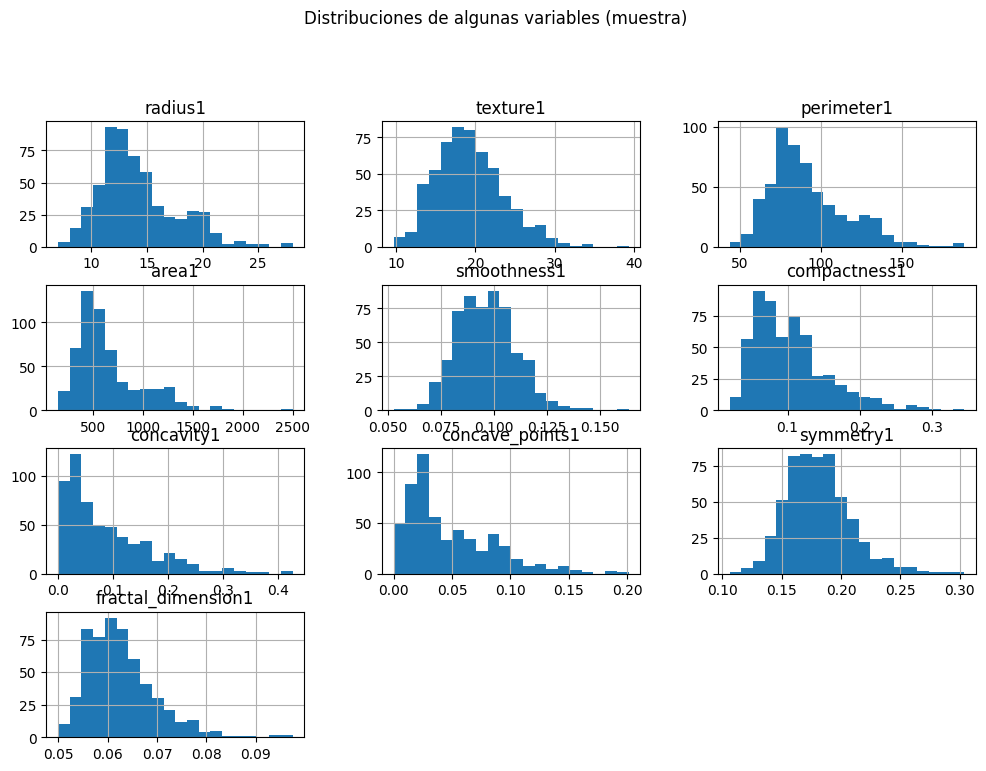

In [21]:
cols_muestra = list(X.columns[:10])

X[cols_muestra].hist(bins=20, figsize=(12,8))
plt.suptitle("Distribuciones de algunas variables (muestra)", y=1.02)
plt.show()

**EDA**

Se aplicó una matriz de correlación para identificar relaciones lineales y redundancia entre features.

La matriz de correlación muestra que varias variables presentan correlaciones positivas fuertes, especialmente aquellas relacionadas con el tamaño del núcleo celular, como radius, perimeter y area. Esto indica que estas variables contienen información similar o redundante. También se observan correlaciones moderadas entre variables relacionadas con la forma, como concavity y concave_points.

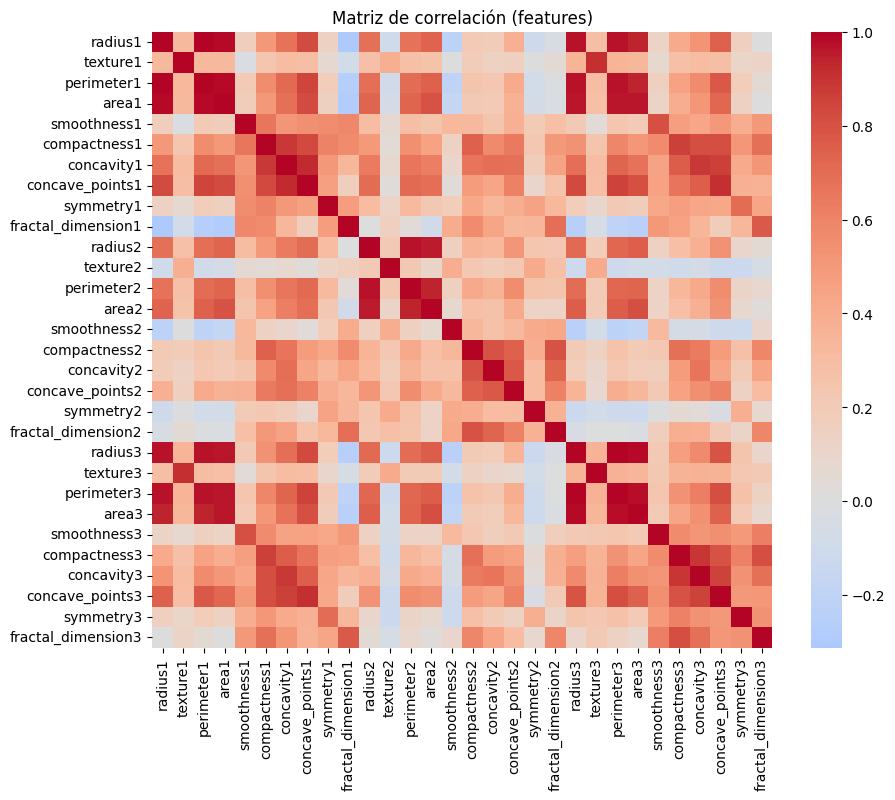

Top 10 correlaciones absolutas (pares de variables):


,,0
radius1,perimeter1,0.997855
radius3,perimeter3,0.993708
radius1,area1,0.987357
perimeter1,area1,0.986507
radius3,area3,0.984015
perimeter3,area3,0.977578
radius2,perimeter2,0.972794
perimeter1,perimeter3,0.970387
radius1,radius3,0.969539
perimeter1,radius3,0.969476


In [22]:
corr = X.corr(numeric_only=True)

plt.figure(figsize=(10,8))
sns.heatmap(corr, cmap="coolwarm", center=0)
plt.title("Matriz de correlación (features)")
plt.show()

# Top correlaciones absolutas entre pares
corr_abs = corr.abs()
upper = corr_abs.where(np.triu(np.ones(corr_abs.shape), k=1).astype(bool))
top_corr = upper.stack().sort_values(ascending=False).head(10)

print("Top 10 correlaciones absolutas (pares de variables):")
display(top_corr)

### 2 **Procedimiento de análisis de componentes principales (PCA)**:


### 2. a) **Estandarización de datos**:



Antes de aplicar PCA, estandarizo las variables para que cada feature tenga media 0 y desviación estándar 1. Esto es necesario porque PCA depende de varianzas/covarianzas, y sin estandarizar, las variables con mayor escala dominarían los componentes principales.

In [24]:
# Estandarización
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

X_std_df = pd.DataFrame(X_std, columns=X.columns, index=X.index)

# Verificación rápida (medias 0, std 1)
display(X_std_df.mean().head(5))
display(X_std_df.std(ddof=0).head(5))

,0
radius1,-1.373633e-16
texture1,6.868164e-17
perimeter1,-1.248757e-16
area1,-2.185325e-16
smoothness1,-8.366672e-16


,0
radius1,1.0
texture1,1.0
perimeter1,1.0
area1,1.0
smoothness1,1.0


### 2. b) **Matriz de covarianza**:

Se calcula la matriz de covarianza a partir de los datos estandarizados. Esta matriz resume cómo varían conjuntamente los pares de variables y es la base para obtener los componentes principales.

Se observan valores altos de covarianza entre variables relacionadas con el tamaño del núcleo celular, como radius, perimeter y area, en sus diferentes versiones. Esto indica que estas variables varían conjuntamente y contienen información similar. También se observan covarianzas elevadas entre variables relacionadas con la forma, como compactness, concavity y concave_points.

In [26]:
cov_matrix = X_std_df.cov()
print("Dimensión de la matriz de covarianza:", cov_matrix.shape)

# Mostrar un bloque pequeño como evidencia
display(cov_matrix)


Dimensión de la matriz de covarianza: (30, 30)


,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,fractal_dimension1,...,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3
radius1,1.001761,0.324352,0.999612,0.989095,0.170882,0.507015,0.677955,0.823977,0.148001,-0.312179,...,0.971246,0.297531,0.966836,0.942739,0.119827,0.414191,0.527839,0.745524,0.164242,0.007078
texture1,0.324352,1.001761,0.330113,0.321651,-0.023430,0.237119,0.302950,0.293981,0.071527,-0.076572,...,0.353194,0.913650,0.358670,0.344151,0.077640,0.278319,0.301555,0.295836,0.105193,0.119415
perimeter1,0.999612,0.330113,1.001761,0.988244,0.207643,0.557917,0.717396,0.852475,0.183349,-0.261937,...,0.971183,0.303572,0.972095,0.943207,0.150814,0.456577,0.564872,0.772599,0.189448,0.051108
area1,0.989095,0.321651,0.988244,1.001761,0.177340,0.499379,0.687191,0.824718,0.151559,-0.283608,...,0.964441,0.287995,0.960808,0.960902,0.123740,0.391098,0.513508,0.723288,0.143823,0.003744
smoothness1,0.170882,-0.023430,0.207643,0.177340,1.001761,0.660284,0.522903,0.554670,0.558757,0.585822,...,0.213495,0.036135,0.239273,0.207082,0.806742,0.473300,0.435691,0.503939,0.395004,0.500195
compactness1,0.507015,0.237119,0.557917,0.499379,0.660284,1.001761,0.884675,0.832598,0.603702,0.566364,...,0.536258,0.248570,0.591250,0.510501,0.566537,0.867333,0.817712,0.817009,0.511122,0.688593
concavity1,0.677955,0.302950,0.717396,0.687191,0.522903,0.884675,1.001761,0.923013,0.501548,0.337376,...,0.689448,0.300407,0.730849,0.677177,0.449612,0.756297,0.885659,0.862839,0.410185,0.515836
concave_points1,0.823977,0.293981,0.852475,0.824718,0.554670,0.832598,0.923013,1.001761,0.463312,0.167211,...,0.831779,0.293267,0.857430,0.811055,0.453550,0.668629,0.753724,0.911758,0.376406,0.369310
symmetry1,0.148001,0.071527,0.183349,0.151559,0.558757,0.603702,0.501548,0.463312,1.001761,0.480766,...,0.186055,0.090810,0.219554,0.177505,0.427426,0.474033,0.434485,0.431054,0.701058,0.439185
fractal_dimension1,-0.312179,-0.076572,-0.261937,-0.283608,0.585822,0.566364,0.337376,0.167211,0.480766,1.001761,...,-0.254138,-0.051359,-0.205512,-0.232263,0.505831,0.459606,0.346843,0.175634,0.334607,0.768648


### 2. c) **Eigenvalores y eigenvectores**:

Los eigenvectores son direcciones (ejes) de los componentes principales.
Los eigenvalores son la varianza capturada por cada componente.
Se sacan de la matriz de covarianza y aquí ordeno los componentes de mayor a menor varianza.

Se observa que PC1 tiene el valor más alto (13.30), por lo que captura la mayor parte de la variabilidad del dataset. PC2 y PC3 también explican una cantidad significativa de varianza. Esto indica que es posible reducir la dimensionalidad usando solo los primeros componentes principales sin perder gran parte de la información.

In [27]:
eigvals, eigvecs = np.linalg.eigh(cov_matrix.to_numpy())

# Ordenar de mayor a menor
idx = np.argsort(eigvals)[::-1]
eigvals_sorted = eigvals[idx]
eigvecs_sorted = eigvecs[:, idx]

eigvals_series = pd.Series(eigvals_sorted, index=[f"PC{i+1}" for i in range(len(eigvals_sorted))])
display(eigvals_series.head(10))


,0
PC1,13.304991
PC2,5.701375
PC3,2.822910
PC4,1.984128
PC5,1.651633
PC6,1.209482
PC7,0.676409
PC8,0.477456
PC9,0.417629
PC10,0.351311


### 2. d) **Matriz de transformación (W) y componentes principales**:

Construyo la matriz de transformación W usando eigenvectores ordenados. Después proyecto los datos estandarizados para obtener las componentes principales. La matriz de transformación se utiliza para obtener las componentes principales multiplicándola por el dataset estandarizado. Esta multiplicación proyecta los datos originales en estos nuevos ejes.

Se observa que PC1 presenta los valores más grandes en magnitud, lo que confirma que es el componente que captura la mayor parte de la variabilidad. Estas componentes reducen la dimensionalidad del dataset, manteniendo la información más relevante en menos variables.

In [29]:
W = pd.DataFrame(
    eigvecs_sorted,
    index=X.columns,
    columns=[f"PC{i+1}" for i in range(eigvecs_sorted.shape[1])]
)

PC_all_df = X_std_df.dot(W)

display(PC_all_df.iloc[:5, :5])


,PC1,PC2,PC3,PC4,PC5
0,-9.192837,1.948583,1.123166,-3.633731,-1.195110
1,-2.387802,-3.768172,0.529293,-1.118264,0.621775
2,-5.733896,-1.075174,0.551748,-0.912083,-0.177086
3,-7.122953,10.275589,3.232790,-0.152547,-2.960878
4,-3.935302,-1.948072,-1.389767,-2.940639,0.546747


### 2. e) **Varianza explicada**:

Se calcula el porcentaje de varianza explicada por cada componente y su acumulado. Esto permite decidir cuántas PCs retener.

Se observa que el primer componente principal (PC1) explica el 44.27% de la varianza total, mientras que los primeros tres componentes explican el 72.64%. Además, se requieren solo 7 componentes para capturar más del 90% de la varianza y 10 componentes para capturar más del 95%. Se puede reducir significativamente la dimensionalidad del dataset conservando la mayor parte de la información.

In [33]:
explained_variance_ratio = eigvals_sorted / eigvals_sorted.sum()
cum_explained = np.cumsum(explained_variance_ratio)

tabla_var = pd.DataFrame({
    "Componente": [f"PC{i+1}" for i in range(len(explained_variance_ratio))],
    "Varianza explicada (%)": explained_variance_ratio * 100,
    "Varianza acumulada (%)": cum_explained * 100
})

display(tabla_var.head(30))

k90 = int(np.argmax(cum_explained >= 0.90) + 1)
k95 = int(np.argmax(cum_explained >= 0.95) + 1)

print(f"Componentes mínimos para capturar >=90% de varianza: {k90}")
print(f"Componentes mínimos para capturar >=95% de varianza: {k95}")


,Componente,Varianza explicada (%),Varianza acumulada (%)
0,PC1,44.272026,44.272026
1,PC2,18.971182,63.243208
2,PC3,9.393163,72.636371
3,PC4,6.602135,79.238506
4,PC5,5.495768,84.734274
5,PC6,4.024522,88.758796
6,PC7,2.250734,91.009530
7,PC8,1.588724,92.598254
8,PC9,1.389649,93.987903
9,PC10,1.168978,95.156881


Componentes mínimos para capturar >=90% de varianza: 7
Componentes mínimos para capturar >=95% de varianza: 10


### 2. f) **Primeros 3 componentes principales**:

Se visualiza PC1–PC3 en 3D y se colorea por diagnóstico para observar estructura y separación entre clases.

Se observa cierta separación entre ambos grupos, aunque existe algo de solapamiento. Esto indica que los primeros tres componentes principales capturan gran parte de la estructura del dataset y preservan información relevante para diferenciar entre las clases.

In [34]:
df_pca3 = PC_all_df[["PC1", "PC2", "PC3"]].copy()
df_pca3 = pd.concat([df_pca3, y], axis=1)

fig = px.scatter_3d(
    df_pca3,
    x="PC1", y="PC2", z="PC3",
    color=col_target,
    title="PCA: Primeras 3 Componentes (PC1, PC2, PC3)",
    opacity=0.8
)
fig.show()


### 2. g) **Primeros 2 componentes principales**:

Se visualiza PC1 vs PC2 para evaluar patrones y posible separación en 2 dimensiones.

Se observa una separación visible especialmente a lo largo de PC1. Aunque existe cierto solapamiento entre las clases, la separación general indica que los primeros dos componentes principales conservan información importante para diferenciar entre tumores benignos y malignos, incluso después de reducir la dimensionalidad.

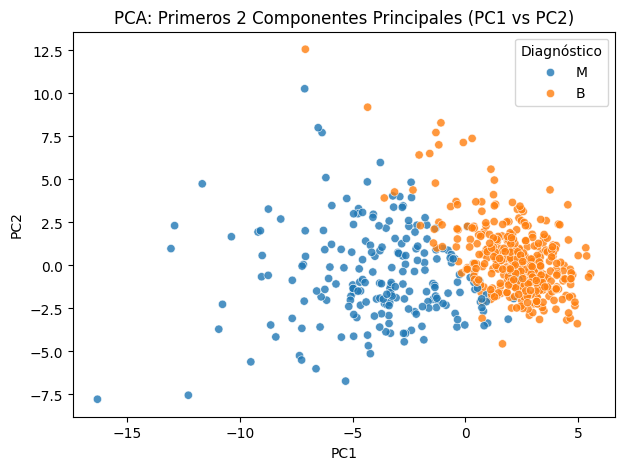

In [36]:
df_pca2 = PC_all_df[["PC1", "PC2"]].copy()
df_pca2 = pd.concat([df_pca2, y], axis=1)

plt.figure(figsize=(7,5))
sns.scatterplot(data=df_pca2, x="PC1", y="PC2", hue=col_target, alpha=0.8)
plt.title("PCA: Primeros 2 Componentes Principales (PC1 vs PC2)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend(title="Diagnóstico")
plt.show()

### 3. **Conclusiones**

El PCA resultó ser efectivo para este dataset de Breast Cancer Wisconsin (Diagnostic) desde UCI, ya que permitió reducir significativamente la dimensionalidad conservando la mayor parte de la varianza, utilizando solo una fracción de las variables originales. La reducción dimensional mostró que los primeros componentes principales capturan la información más relevante y preservan la estructura del dataset, permitiendo observar una separación entre las clases. Esto indica que el espacio reducido es adecuado para arquitecturas neuronales de clasificación, ya que mantiene la información necesaria para diferenciar entre tumores benignos y malignos, al mismo tiempo que reduce la complejidad del modelo.

### **Referencias**

Wolberg, W., Mangasarian, O., Street, N., & Street, W. (1993). Breast Cancer Wisconsin (Diagnostic) [Dataset]. UCI Machine Learning Repository. https://doi.org/10.24432/C5DW2B.

IBM. (s.f.). ¿Qué es el análisis de componentes principales (PCA)? IBM Think.https://www.ibm.com/mx-es/think/topics/principal-component-analysis

Repo: https://github.com/AdrianGM04/02-Principal-Component-Analysis